## Missing Values- 1

Lifecycle of a Data Science Project-
1. Data Collection Statergy---from company side,3rd party APi's,Surveys etc.
2. Feature Engineering---Handling Missing Values

Why occurence of Missing values in some Survey--Depression Survey?
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

## Classification of missing data

First, we need to understand what are the types of missing data. Missingness is broadly categorized in 3 categories:
* Missing Completely at Random (MCAR)
* Missing at Random (MAR):
* Missing not at Random (MNAR)

#### What are the different types of Missing Data?

1. ##### Missing Completely at Random (MCAR):
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely ``NO relationship`` between the data missing and any other features or with same feature, observed or missing, but it is due to the some other reason.

which means we ``can't predict`` the missing value from any other values from the dataset Since missingness is due to the some other reason.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#example for MCAR.
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. ##### Missing Data Not At Random(MNAR):
There is absolutely some relationship between the data missing and any other values or with same feature or with some other reason.

when data not fall under MAR and MCAR.

* MNAR implies there was some specific reason why the respondent didn't fill up that field, so hence it is not missing at random.

In [6]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [22]:
a = df.groupby(['Survived'])
a['cabin_null'].value_counts()

Survived  cabin_null
0         1             481
          0              68
1         1             206
          0             136
Name: cabin_null, dtype: int64

In [23]:
df.groupby(['Survived'])['cabin_null'].mean()
# it tells us percentage of died people having cabin (vs) percentage of survived people having cabin...

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### 3.Missing At Random(MAR)

* Missing at Random is there is absolutely some ``relationship`` between the data missing and any other features,and is also due to the some other reason. But ``not`` with same feature.

* MAR implies that the missingness of a field can be explained by the values in other columns but not from that column.

* missing data is moderate.

### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation


## 1.Mean/ MEdian /Mode imputation
#### When should we apply?
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). Basically missing data should be ``small``. We solve this by replacing the NAN with the most frequent occurance of the variables

In [2]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [5]:
median=df.Age.median()
median

28.0

In [6]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [7]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

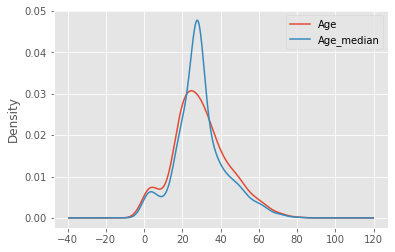

In [18]:
plt.style.use('ggplot')
df['Age'].plot.kde()
df['Age_median'].plot.kde()

plt.legend() #for a dataframe series this function automatically calls the labels as columns of dataset....
plt.show()

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation
